## **Role Models**
Presented by Aldrin G. Hsu, Wesley Brian T. Sy, and Gian Martin C. Carlos



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

### **Dataset Overview**  
The dataset includes national-level data from the Philippines showcasing the **percentage share of total family income and total family expenditure**, disaggregated by **each region, province, and highly urbanized city (HUC)** for the years **2018**, **2021**, and **2023**. These figures allow for data analysis in the trends of income distribution and household spending behavior across each geographic locations and time period in the Philippines.

---

### **How the Dataset Was Collected**  
The dataset was collected by the **Philippine Statistics Authority (PSA)** as part of their **Family Income and Expenditure Survey (FIES)**. The FIES is conducted every three years using techniques such as probability sampling to gather economic data across the country. The Surveys are administered in person by PSA field staffs.

---

### **Potential Implications of Data Collection**  
Since the survey relies on **self-reported data**, responses may be affected by **recall bias or underreporting**, especially on sensitive financial matters. Additionally, regions that are remote and households in the informal sector may have underpresented and inconsistent data due to logistical, economic, and social reasons. Factors such as these mentioned can affect the accuracy and generalizability of the income and expenditure shares reported in the dataset.

---

### **Structure of the Data**  
The dataset is **structured and tabular**.

Each **row** represents:  
- A specific **geographical unit** (Region, Province, or HUC) for a **specific year** (2018, 2021, or 2023).

Each **column** represents:  
- Either a share of **total income** (Table 6) or **total expenditure** (Table 7).

**Total Number of Observations**:  
- Varies based on the number of geographic units reported for each year.

**Attributes/Features Present**:  
- `Year` – The survey year  
- `Geographic_Unit` – Region/Province/HUC  
- `Income_Share` – % share to total national income  
- `Expenditure_Share` – % share to total national expenditure

---

### **Brief Description of the Attributes**

| Attribute Name            | Description |
|---------------------------|-------------|
| `Year`                    | Survey year (2018, 2021, or 2023) |
| `Region`                  | Name of the region (e.g., NCR, Region IV-A) |
| `Province` / `HUC`        | Name of the province or highly urbanized city |
| `Income_Share (%)`        | Share of the geographic unit to the total national family income |
| `Expenditure_Share (%)`   | Share of the geographic unit to the total national family expenditure |

In [60]:
#dfIncome = pd.read_excel("Table 6. 2018, 2021 and 2023p Share to Total Annual Family Income, by Region, Province and HUC.xlsx", engine="openpyxl")
#dfExpenditure = pd.read_excel("Table 7. 2018, 2021 and 2023p Share to Total Family Expenditure, by Region, Province and HUC.xlsx", engine="openpyxl")

In [61]:
#dfIncome.head(10)
#dfExpenditure.head(10)

### **Data Cleaning**
As seen in the dataframe above, there are unnecessary NaNs due to the way the files are formatted. To make the data easier to read and clean, we split the two datasets into six CSV files. The data in the files are based on whether they are for Income or Expenditure and based on their year (2018, 2021, or 2023). Note that we did not make new CSV files for Percentage Point Change since those values could be derived using the yearly data.

In [2]:
#Uncomment if using Google Colab
#from google.colab import drive
#drive.mount('/content/drive')
#Income18 = pd.read_csv("/content/drive/MyDrive/CSMODEL/I18.csv")
#Income21 = pd.read_csv("/content/drive/MyDrive/CSMODEL/I21.csv")
#Income23 = pd.read_csv("/content/drive/MyDrive/CSMODEL/I23.csv")
#Expenditure18 = pd.read_csv("/content/drive/MyDrive/CSMODEL/E18.csv")
#Expenditure21 = pd.read_csv("/content/drive/MyDrive/CSMODEL/E21.csv")
#Expenditure23 = pd.read_csv("/content/drive/MyDrive/CSMODEL/E23.csv")

#Table 6. 2018, 2021 and 2023p Share to Total Annual Family Income, by Region, Province and HUC
Income18 = pd.read_csv("I18.csv")
Income21 = pd.read_csv("I21.csv")
Income23 = pd.read_csv("I23.csv")

#Table 7. 2018, 2021 and 2023p Share to Total Family Expenditure, by Region, Province and HUC
Expenditure18 = pd.read_csv("E18.csv")
Expenditure21 = pd.read_csv("E21.csv")
Expenditure23 = pd.read_csv("E23.csv")

You may use this code block to see the data of one of our dataframes.

In [3]:
#Initial state of the dataset
#Income18.head(10)
#Income21.head(10)
#Income23.head(10)

#Expenditure18.head(10)
#Expenditure21.head(10)
Expenditure23.head(10)

,Unnamed: 0,PHILIPPINES,NATIONAL CAPITAL REGION,City of Manila,City of Mandaluyong,City of San Juan,Quezon City,City of Marikina,City of Pasig,City of Caloocan,...,Dinagat Islands,BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/,Basilan,Lanao Del Sur,Maguindanao,Maguindanao del Sur,Maguindanao del Norte,Sulu,Tawi-Tawi,Cotabato City
0,Share to Family Expenditure,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100
1,Food and Non-Alcoholic Beverages,40.9,37.7,44.1,36.2,31.4,39.8,35.4,32.0,40.9,...,45.2,57.5,55.1,62.5,55.2,56.7,53.6,64.7,46.3,47
2,Food Consumed at Home,35.3,27.8,30.2,25.3,22.5,26.3,24.5,25.2,32.8,...,44.7,54.3,53.8,58.7,51.0,51.8,50.1,63.2,46.1,41.6
3,Food Regularly Consumed Outside the Home,5.6,9.9,13.9,10.9,9.0,13.5,10.9,6.8,8.2,...,0.6,3.2,1.4,3.8,4.2,4.8,3.6,1.5,0.2,5.3
4,Service for Processing Primary Goods for F...,0.0,-,-,0.0,-,-,-,0.0,-,...,-,0.0,0.0,0.0,0.0,0.0,-,0.0,0,-
5,Alcoholic Beverages and Tobacco,1.4,1.2,1.4,1.0,0.6,1.6,1.0,1.2,0.9,...,1.4,1.2,1.4,1.1,1.2,1.2,1.3,0.8,2.4,0.9
6,Clothing and Footwear,1.9,1.6,1.5,1.8,2.0,1.5,1.4,1.7,1.6,...,2.2,3.0,2.9,2.2,3.0,2.9,3.2,3.3,3.7,2.9
7,"Housing, Water, Electricity, Gas and Other Fuels",22.9,28.8,26.2,30.5,31.0,25.8,28.1,30.2,25.8,...,19.6,14.6,14.6,13.2,14.3,12.9,15.8,10.3,26.6,19.1
8,Furnishings and Routine Household Maintenance,2.6,2.6,1.9,2.4,3.1,2.9,3.0,2.5,2.3,...,2.8,2.2,2.1,1.5,2.7,2.8,2.7,2.6,2.4,2.6
9,Health,3.0,2.8,2.3,3.0,2.3,3.5,4.6,3.5,2.2,...,2.5,1.4,1.1,1.4,1.4,1.3,1.5,1.4,0.8,1.8


Since our dataset is split into 6 dataframes, it will be efficient to use loops for the operations that will follow.

In [4]:
IE = {
    "Income18": Income18,
    "Income21": Income21,
    "Income23": Income23,
    "Expenditure18": Expenditure18,
    "Expenditure21": Expenditure21,
    "Expenditure23": Expenditure23
}

We observed that the regions (ie. NCR and BARMM) and the cities (ie. City of Manila and City of Mandaluyong) are in the first row, while variables such as Wage/Salaries and Food and Non-Alcoholic Beverages are in the first column. Thus, we transposed each dataframe to avoid confusion on which are the variables and which are the observations.

In [5]:
for df in IE:
  IE[df] = IE[df].transpose()

#Observe the contents for Maguindanao del Norte and Maguindanao del Sur
IE["Expenditure18"].tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Dinagat Islands,100.0,45.9,43.0,2.9,-,1.4,3.4,14.5,2.2,3.0,4.9,1.1,0.9,3.8,0.4,-,6.1,5.1,5.4,1.9
BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/,100.0,59.9,54.0,5.8,-,1.6,2.5,14.6,1.3,1.1,4.6,1.2,0.4,2.1,0.0,-,6.1,1.3,1.9,1.4
Basilan,100.0,58.5,53.6,4.9,-,1.7,2.8,11.0,1.3,1.4,5.3,1.3,0.4,1.6,0.1,-,6.8,3.2,3.7,1.1
Lanao Del Sur,100.0,59.5,53.6,5.9,-,1.4,2.5,15.3,1.8,1.4,4.8,1.0,0.4,1.8,0.0,-,6.4,1.1,0.8,1.9
Maguindanao,100.0,59.3,50.9,8.4,-,2.1,2.6,14.6,1.2,1.1,4.8,1.3,0.5,1.5,0.0,-,5.6,1.5,2.7,1.3
Maguindanao del Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maguindanao del Norte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sulu,100.0,66.0,65.3,0.7,-,1.3,2.3,11.9,0.9,0.6,3.1,1.0,0.3,4.6,0.0,-,5.4,0.4,0.9,1.4
Tawi-Tawi,100.0,61.0,59.6,1.4,-,1.2,3.1,15.4,1.2,0.6,5.6,1.2,0.4,0.9,-,-,6.2,0.9,1.3,1.1
Cotabato City,100.0,53.4,43.4,10.0,-,1.0,2.1,19.5,1.3,1.4,4.8,1.7,0.4,2.1,0.0,-,6.8,1.9,2.4,1.2


We observed that Maguindanao del Norte and Maguindanao del Sur are the only regions that lack a majority of their expected values in both Income and Expenditure. Thus, we removed the rows for Maguindanao del Norte and and Maguindanao del Sur from all of our dataframes.

In [6]:
for df in IE:
  IE[df].drop(labels="Maguindanao del Sur", inplace=True)
  IE[df].drop(labels="Maguindanao del Norte", inplace=True)

IE["Expenditure23"].tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Surigao Del Norte,100.0,44.4,43.2,1.3,0.0,1.6,1.8,21.2,2.7,2.9,5.9,2.8,0.7,4.6,0.0,2.5,3.4,1.2,3.1,1.3
Surigao Del Sur,100.0,48.5,46.4,2.1,-,1.1,1.5,18.4,2.3,2.3,5.5,2.6,0.6,3.1,0.1,2.5,3.9,1.2,4.4,2.0
Dinagat Islands,100.0,45.2,44.7,0.6,-,1.4,2.2,19.6,2.8,2.5,5.3,1.9,0.9,3.6,0.1,2.3,3.6,2.5,4.5,1.8
BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/,100.0,57.5,54.3,3.2,0.0,1.2,3.0,14.6,2.2,1.4,5.0,1.7,0.7,2.1,0.0,0.8,4.7,1.6,2.3,1.4
Basilan,100.0,55.1,53.8,1.4,0.0,1.4,2.9,14.6,2.1,1.1,5.7,1.6,0.9,3.5,-,0.8,5.3,3.0,1.6,0.7
Lanao Del Sur,100.0,62.5,58.7,3.8,0.0,1.1,2.2,13.2,1.5,1.4,4.1,1.2,0.5,2.5,0.1,1.2,4.0,1.1,1.4,2.1
Maguindanao,100.0,55.2,51.0,4.2,0.0,1.2,3.0,14.3,2.7,1.4,5.5,2.2,0.9,1.9,0.0,0.5,4.8,1.6,3.6,1.2
Sulu,100.0,64.7,63.2,1.5,0.0,0.8,3.3,10.3,2.6,1.4,3.8,1.3,0.4,0.7,0.0,0.3,5.6,1.2,2.5,1.3
Tawi-Tawi,100,46.3,46.1,0.2,0,2.4,3.7,26.6,2.4,0.8,6.8,1.5,0.5,2.2,-,0.1,4.4,1.1,1.1,0.3
Cotabato City,100,47,41.6,5.3,-,0.9,2.9,19.1,2.6,1.8,6.3,2.9,1.1,2.6,0.1,1.2,4.4,2.5,3.2,1.5


We observed in our dataframes for Expenditure that variables such as Service for Processing Primary Goods for Food and Non- alcoholic Beverages and Hotels (Accommodation Services) have many missing values represented by "-". We replaced all instances of "-" with 0 since it seemed reasonable for those variables to not contribute to the total expenditure of the given regions/cities.

In [7]:
for df in IE:
  IE[df].iloc[1:, 1:] = (
    IE[df].iloc[1:, 1:]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
  )

Lastly, the dataset contains the mean statistics from each region -- which we will not be using as the dataset already contains the data from where the regional data is derived from, causing it to appear as a duplicate for the purpose of this study. Hence, we will be dropping these entries from the dataframes.

In [8]:
for df in IE:
  IE[df].drop(labels=["PHILIPPINES",
                              "NATIONAL CAPITAL REGION",
                              "CAR - CORDILLERA ADMINISTRATIVE REGION",
                              "REGION I - ILOCOS REGION",
                              "REGION II - CAGAYAN VALLEY",
                              "REGION III - CENTRAL LUZON",
                              "REGION IVA - CALABARZON",
                              "MIMAROPA REGION",
                              "REGION V - BICOL REGION",
                              "REGION VI - WESTERN VISAYAS",
                              "NEGROS ISLAND REGION",
                              "REGION VII - CENTRAL VISAYAS",
                              "REGION VIII - EASTERN VISAYAS",
                              "REGION IX - ZAMBOANGA PENINSULA",
                              "REGION X - NORTHERN MINDANAO",
                              "REGION XI - DAVAO REGION",
                              "REGION XII - SOCCSKSARGEN1/",
                              "CARAGA",
                              "BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/"
                              ],inplace=True)

In [9]:
#Final state of the dataset
IE["Income18"].name = "Income18"
IE["Income21"].name = "Income21"
IE["Income23"].name = "Income23"
IE["Expenditure18"].name = "Expenditure18"
IE["Expenditure21"].name = "Expenditure21"
IE["Expenditure23"].name = "Expenditure23"

This concludes the data cleaning for our dataset. You may use this code block to see how our data is currently organized in our dataframes.

In [26]:
#IE["Income18"].head(30)
#IE["Income21"].tail()
IE["Income23"].head()

#IE["Expenditure18"].tail()
#IE["Expenditure21"].tail()
#IE["Expenditure23"].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unnamed: 0,Share to Family Income,Wage/Salaries,Entrepreneurial Activities,Cash Receipts from Abroad,Cash Receipts from Domestic Sources,Rentals Received,Interest,Pension,Dividends,"Other Source of Income, NEC","Net Share of Crops, Aquaculture Products or Li...",Net Receipt from Family Sustenance Activities,Received as Gifts,Imputed Rent
City of Manila,100.0,64.3,16.2,4.1,2.9,0.5,0.0,1.6,0.4,0.1,0.0,0.0,1.5,8.5
City of Mandaluyong,100.0,63.5,12.4,5.5,1.9,0.6,0.1,3.3,0.1,0.1,0.0,0.0,1.5,11.0
City of San Juan,100.0,55.9,13.7,4.6,1.9,0.7,0.1,3.5,6.2,0.0,0.0,0.1,1.0,12.5
Quezon City,100.0,69.5,9.1,3.2,1.6,1.2,0.1,2.7,0.7,0.0,0.0,0.0,0.9,11.0


### **Exploratory Data Analysis**

### **1. Does having a higher percent in Cash Receipts from Abroad correlate to higher percent of spending in Education?**
Null and Alternative Hypotheses:
- H0: Cash receipts have no positive correlation with education.
- H1: Cash receipts have a positive correlation with education.

We will be using **Pearson’s Correlation** with a **one-tailed test** and significance level **0.05** for hypothesis testing.

To see the correlation of these variables over time, we decided to use data from all tables. We isolated the key variables (Cash Receipts from Abroad and Education) and then used the pearsonr() function to find the correlation between each series with the same year. Lastly, we get the average across all years to get the correlation across all years.

In [11]:
#Get only the needed variables into a series
IEQ1 = {}
IEQ1.update({"Income18":IE["Income18"][3]})
IEQ1.update({"Income21":IE["Income21"][3]})
IEQ1.update({"Income23":IE["Income23"][3]})
IEQ1.update({"Expenditure18":IE["Expenditure18"][13]})
IEQ1.update({"Expenditure21":IE["Expenditure21"][13]})
IEQ1.update({"Expenditure23":IE["Expenditure23"][13]})

#Remove the label row and set all data types to numeric
for df in IEQ1:
  IEQ1[df] = IEQ1[df].iloc[1:]
  IEQ1[df] = list(IEQ1[df])

#Using pearson's correlation
meanCorr = 0
meanPVal = 0

correlation, p_value = pearsonr(IEQ1["Income18"], IEQ1["Expenditure18"])
if correlation > 0:
    p_one_tailed = p_value / 2
else:
    p_one_tailed = 1 - (p_value / 2)
print("2018 Correlation coefficient (r):", correlation)
print("2018 P-value (One-tailed):", p_one_tailed)
print()
meanCorr += correlation
meanPVal += p_one_tailed

correlation, p_value = pearsonr(IEQ1["Income21"], IEQ1["Expenditure21"])
if correlation > 0:
    p_one_tailed = p_value / 2
else:
    p_one_tailed = 1 - (p_value / 2)
print("2021 Correlation coefficient (r):", correlation)
print("2021 P-value (One-tailed):", p_one_tailed)
print()
meanCorr += correlation
meanPVal += p_one_tailed

correlation, p_value = pearsonr(IEQ1["Income23"], IEQ1["Expenditure23"])
if correlation > 0:
    p_one_tailed = p_value / 2
else:
    p_one_tailed = 1 - (p_value / 2)
print("2023 Correlation coefficient (r):", correlation)
print("2023 P-value (One-tailed):", p_one_tailed)
print()
meanCorr += correlation
meanPVal += p_one_tailed
meanCorr /= 3
meanPVal /= 3


print("Correlation coefficient (r):", meanCorr)
print("P-value (One-tailed):", meanPVal)

2018 Correlation coefficient (r): -0.09994651691724583
2018 P-value (One-tailed): 0.8581774581604902

2021 Correlation coefficient (r): 0.10821461394013614
2021 P-value (One-tailed): 0.12274641446433915

2023 Correlation coefficient (r): 0.2640734878696867
2023 P-value (One-tailed): 0.002007525596644448

Correlation coefficient (r): 0.09078052829752566
P-value (One-tailed): 0.3276437994071579


Since p-value (~0.0328) > significance level (0.05), we **do not reject** the null hypothesis.

We then conclude that cash receipts have no positive correlation with education.

The following code visualizes the data across 2018, 2021, and 2023.

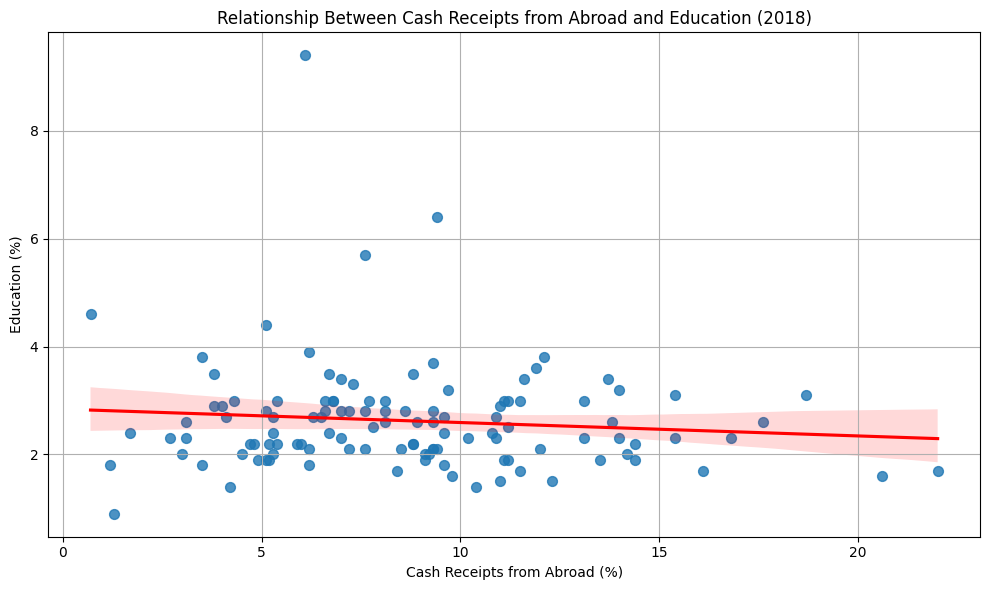

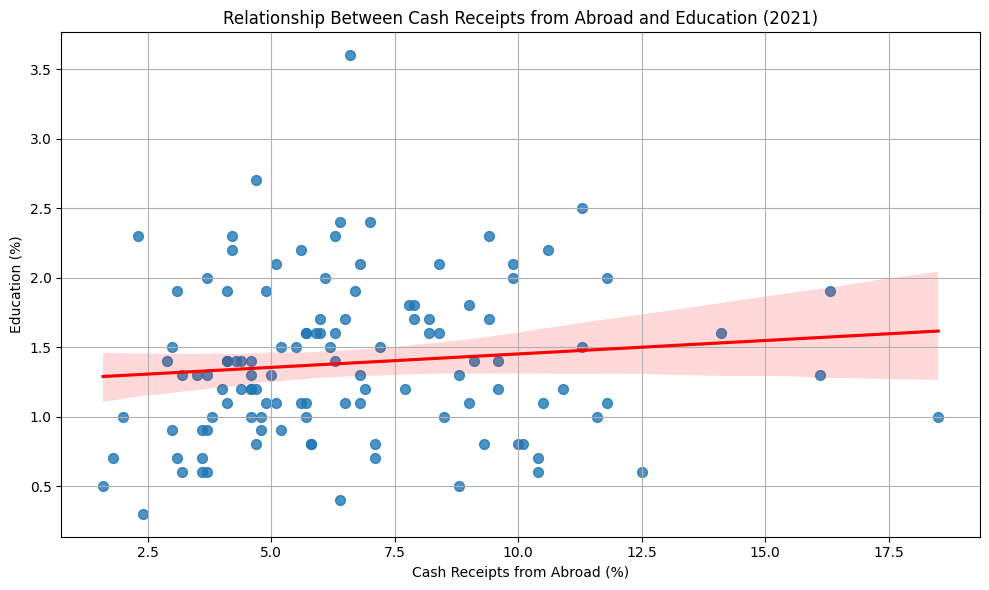

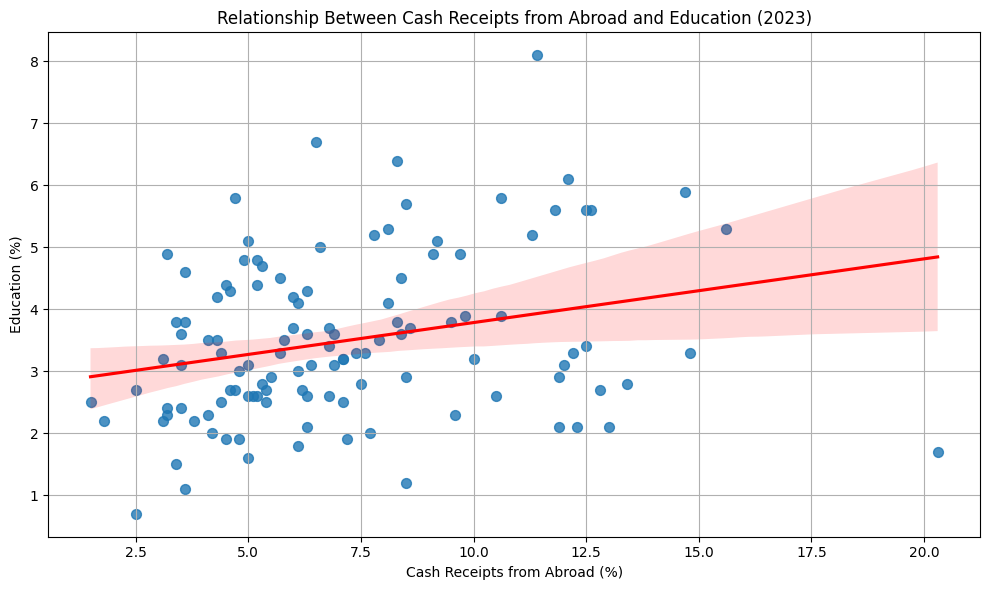

In [12]:
dfNumeric = pd.DataFrame({
    "Cash Receipts from Abroad": IEQ1["Income18"],
    "Education": IEQ1["Expenditure18"]
})

plt.figure(figsize=(10, 6))
sns.regplot(
    data=dfNumeric,
    x="Cash Receipts from Abroad",
    y="Education",
    scatter_kws={'s': 50},
    line_kws={'color': 'red'}
)
plt.title("Relationship Between Cash Receipts from Abroad and Education (2018)")
plt.xlabel("Cash Receipts from Abroad (%)")
plt.ylabel("Education (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

dfNumeric = pd.DataFrame({
    "Cash Receipts from Abroad": IEQ1["Income21"],
    "Education": IEQ1["Expenditure21"]
})

plt.figure(figsize=(10, 6))
sns.regplot(
    data=dfNumeric,
    x="Cash Receipts from Abroad",
    y="Education",
    scatter_kws={'s': 50},
    line_kws={'color': 'red'}
)
plt.title("Relationship Between Cash Receipts from Abroad and Education (2021)")
plt.xlabel("Cash Receipts from Abroad (%)")
plt.ylabel("Education (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

dfNumeric = pd.DataFrame({
    "Cash Receipts from Abroad": IEQ1["Income23"],
    "Education": IEQ1["Expenditure23"]
})

plt.figure(figsize=(10, 6))
sns.regplot(
    data=dfNumeric,
    x="Cash Receipts from Abroad",
    y="Education",
    scatter_kws={'s': 50},
    line_kws={'color': 'red'}
)
plt.title("Relationship Between Cash Receipts from Abroad and Education (2023)")
plt.xlabel("Cash Receipts from Abroad (%)")
plt.ylabel("Education (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

### **2. Does the contribution of salary to family income affect the expenditure habits of the cities in the Philippines?**
Here are the Null and Alternative Hypotheses:
- H0: There is no significant relationship between the percentage of income from wages/salaries and family expenditure in the Philippines.
- H1: There is no significant relationship between the percentage of income from wages/salaries and family expenditure in the Philippines.

To solve our rearch question, we will use **Pearson’s Correlation** with a **one-tailed test**, and we will use a significance level of **0.05** for our hypothesis testing.

To get the latest data, we decided to use only the data from 2023. We isolated Wages/Salaries from Income 2023 as its own dataframe. Then, we combined it and Expenditure 2023 into a new single dataframe.

In [45]:
Wages = IE["Income23"][1]
Expenditure = IE["Expenditure23"]
combinedDf = pd.concat([Wages, Expenditure], axis=1)

combinedDf

,1,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,Wage/Salaries,Share to Family Expenditure,Food and Non-Alcoholic Beverages,Food Consumed at Home,Food Regularly Consumed Outside the Home,Service for Processing Primary Goods for F...,Alcoholic Beverages and Tobacco,Clothing and Footwear,"Housing, Water, Electricity, Gas and Other Fuels",Furnishings and Routine Household Maintenance,...,Transport,Information and Communication,"Recreation, Sport and Culture",Education,Hotels (Accommodation Services),Insurance and Financial Services,"Personal Care, Social Protection and Miscellan...",Durable Furniture and Equipment,Special Family Occasion,Other Expenditures
City of Manila,64.3,100.0,44.1,30.2,13.9,0.0,1.4,1.5,26.2,1.9,...,5.1,3.4,0.6,2.3,0.0,2.9,3.2,0.8,1.0,3.3
City of Mandaluyong,63.5,100.0,36.2,25.3,10.9,0.0,1.0,1.8,30.5,2.4,...,5.2,3.6,0.7,2.9,0.0,3.2,3.1,1.3,1.3,3.8
City of San Juan,55.9,100.0,31.4,22.5,9.0,0.0,0.6,2.0,31.0,3.1,...,6.5,3.2,0.9,2.7,0.1,3.3,3.0,1.4,1.6,7.0
Quezon City,69.5,100.0,39.8,26.3,13.5,0.0,1.6,1.5,25.8,2.9,...,7.2,3.8,0.8,2.3,0.1,2.8,3.4,2.0,1.1,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lanao Del Sur,27.9,100.0,62.5,58.7,3.8,0.0,1.1,2.2,13.2,1.5,...,4.1,1.2,0.5,2.5,0.1,1.2,4.0,1.1,1.4,2.1
Maguindanao,25.8,100.0,55.2,51.0,4.2,0.0,1.2,3.0,14.3,2.7,...,5.5,2.2,0.9,1.9,0.0,0.5,4.8,1.6,3.6,1.2
Sulu,13.9,100.0,64.7,63.2,1.5,0.0,0.8,3.3,10.3,2.6,...,3.8,1.3,0.4,0.7,0.0,0.3,5.6,1.2,2.5,1.3
Tawi-Tawi,24.8,100,46.3,46.1,0.2,0.0,2.4,3.7,26.6,2.4,...,6.8,1.5,0.5,2.2,0.0,0.1,4.4,1.1,1.1,0.3


We can see that the indexing for the columns is off, and the proper column headers are in the first row instead. To remedy this, we made the values of row 1 into the column headers, and we deleted the first row since it became redundant. We also see the column for Share to Family Expenditure as unnecessary since it represents the sum of all the other expenditure columns. Thus, we deleted that column as well.

In [46]:
combinedDf.columns = combinedDf.iloc[0]   
combinedDf = combinedDf.drop(combinedDf.index[0])
combinedDf = combinedDf.drop("Share to Family Expenditure", axis=1)

You may use this code block to see the current state of our combined dataframe.

In [47]:
combinedDf 

Unnamed: 0,Wage/Salaries,Food and Non-Alcoholic Beverages,Food Consumed at Home,Food Regularly Consumed Outside the Home,Service for Processing Primary Goods for Food and\n Non- alcoholic Beverages,Alcoholic Beverages and Tobacco,Clothing and Footwear,"Housing, Water, Electricity, Gas and Other Fuels",Furnishings and Routine Household Maintenance,Health,Transport,Information and Communication,"Recreation, Sport and Culture",Education,Hotels (Accommodation Services),Insurance and Financial Services,"Personal Care, Social Protection and Miscellaneous Goods and Services",Durable Furniture and Equipment,Special Family Occasion,Other Expenditures
City of Manila,64.3,44.1,30.2,13.9,0.0,1.4,1.5,26.2,1.9,2.3,5.1,3.4,0.6,2.3,0.0,2.9,3.2,0.8,1.0,3.3
City of Mandaluyong,63.5,36.2,25.3,10.9,0.0,1.0,1.8,30.5,2.4,3.0,5.2,3.6,0.7,2.9,0.0,3.2,3.1,1.3,1.3,3.8
City of San Juan,55.9,31.4,22.5,9.0,0.0,0.6,2.0,31.0,3.1,2.3,6.5,3.2,0.9,2.7,0.1,3.3,3.0,1.4,1.6,7.0
Quezon City,69.5,39.8,26.3,13.5,0.0,1.6,1.5,25.8,2.9,3.5,7.2,3.8,0.8,2.3,0.1,2.8,3.4,2.0,1.1,1.7
City of Marikina,64.3,35.4,24.5,10.9,0.0,1.0,1.4,28.1,3.0,4.6,7.4,3.8,0.9,2.5,0.0,3.2,3.4,1.5,1.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lanao Del Sur,27.9,62.5,58.7,3.8,0.0,1.1,2.2,13.2,1.5,1.4,4.1,1.2,0.5,2.5,0.1,1.2,4.0,1.1,1.4,2.1
Maguindanao,25.8,55.2,51.0,4.2,0.0,1.2,3.0,14.3,2.7,1.4,5.5,2.2,0.9,1.9,0.0,0.5,4.8,1.6,3.6,1.2
Sulu,13.9,64.7,63.2,1.5,0.0,0.8,3.3,10.3,2.6,1.4,3.8,1.3,0.4,0.7,0.0,0.3,5.6,1.2,2.5,1.3
Tawi-Tawi,24.8,46.3,46.1,0.2,0.0,2.4,3.7,26.6,2.4,0.8,6.8,1.5,0.5,2.2,0.0,0.1,4.4,1.1,1.1,0.3


In [ ]:
combinedDf = combinedDf.apply(pd.to_numeric, errors='coerce')

wages = combinedDf["Wage/Salaries"]

for col in combinedDf.columns:
    if col != "Wage/Salaries":
        spending = combinedDf[col]
        r, p = pearsonr(wages, spending)
        
        strength = ""
        abs_r = abs(r)
        if abs_r >= 0.7:
            strength = "strong"
        elif abs_r >= 0.4:
            strength = "moderate"
        elif abs_r >= 0.2:
            strength = "weak"
        else:
            strength = "very weak or none"
        
        direction = "positive" if r > 0 else "negative"

        significance = "significant" if p < 0.05 else "not significant"

        print(f"Correlation with {col.strip()}:")
        print(f"  r = {r:.4f}, p = {p:.4f}")
        print(f"  → {strength.capitalize()} {direction} correlation ({significance})")
        print("-" * 50)



Correlation with Food and Non-Alcoholic Beverages:
  r = -0.6328, p-value = 0.0000
----------------------------------------
Correlation with     Food Consumed at Home:
  r = -0.7470, p-value = 0.0000
----------------------------------------
Correlation with     Food Regularly Consumed Outside the Home:
  r = 0.5677, p-value = 0.0000
----------------------------------------
Correlation with     Service for Processing Primary Goods for Food and
    Non- alcoholic Beverages:
  r = -0.1940, p-value = 0.0361
----------------------------------------
Correlation with Alcoholic Beverages and Tobacco:
  r = -0.2753, p-value = 0.0027
----------------------------------------
Correlation with Clothing and Footwear:
  r = -0.5848, p-value = 0.0000
----------------------------------------
Correlation with Housing, Water, Electricity, Gas and Other Fuels:
  r = 0.6446, p-value = 0.0000
----------------------------------------
Correlation with Furnishings and Routine Household Maintenance:
  r = 0.079

Q3 (Don't know how to do Q2 yet)


array([[<Axes: title={'center': '2018'}>,
        <Axes: title={'center': '2021'}>],
       [<Axes: title={'center': '2023'}>, <Axes: >]], dtype=object)

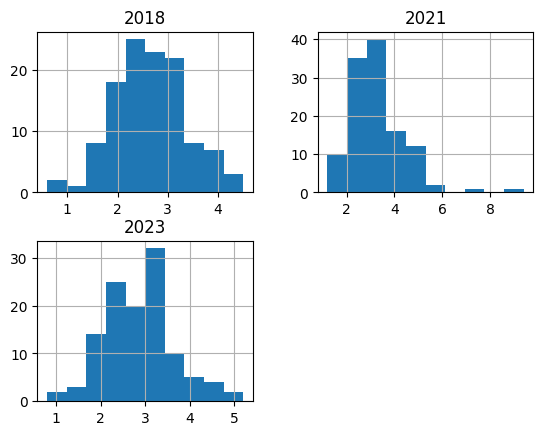

In [73]:
IEQ3 = pd.DataFrame({'2018': IE["Expenditure18"][9],
                     '2021': IE["Expenditure21"][9],
                     '2023': IE["Expenditure23"][9]})
IEQ3 = IEQ3.iloc[1:]
IEQ3 = IEQ3.apply(pd.to_numeric)
IEQ3.hist()

### **4. Does a higher percentage in income from entrepeneurial activities correlate to higher spending in transport?**
Here are the Null and Alternative Hypotheses:
- H0: There is no positive correlation between Entrepeneurial Activities and Transport.
- H1: There is a positive correlation between Entrepeneurial Activities and Transport.

To solve our rearch question, we will use **Pearson’s Correlation** with a **one-tailed test**, and we will use a significance level of **0.05** for our hypothesis testing.

To get the latest data, we decided to use only the data from 2023. We isolated the key variables (Entrepeneurial Activities and Transport) from Income 2023 and Expenditure 2023 as their own dataframes. Then, we combined them into a new single dataframe.

In [13]:
EntrepeneurialActivities = IE["Income23"][2]
Transport = IE["Expenditure23"][10]

dfCombined = pd.DataFrame({
    "Entrepreneurial Activities": EntrepeneurialActivities,
    "Transport": Transport
})

dfCombined

,Entrepreneurial Activities,Transport
Unnamed: 0,Entrepreneurial Activities,Transport
City of Manila,16.2,5.1
City of Mandaluyong,12.4,5.2
City of San Juan,13.7,6.5
Quezon City,9.1,7.2
...,...,...
Lanao Del Sur,45.8,4.1
Maguindanao,54.3,5.5
Sulu,74.7,3.8
Tawi-Tawi,49.5,6.8


We can see that the labels in the first row are redundant, so we removed it from the dataframe.

In [14]:
dfCombined = dfCombined.drop(dfCombined.index[0])

You may use this code block to see the current state of our combined dataframe.

In [15]:
dfCombined

,Entrepreneurial Activities,Transport
City of Manila,16.2,5.1
City of Mandaluyong,12.4,5.2
City of San Juan,13.7,6.5
Quezon City,9.1,7.2
City of Marikina,9.3,7.4
...,...,...
Lanao Del Sur,45.8,4.1
Maguindanao,54.3,5.5
Sulu,74.7,3.8
Tawi-Tawi,49.5,6.8


We will be using Pearson's Correlation to determine the relationship between Entrepeneurial Activities and Transport. To ensure tha the data is compatible with the pearsonr() function, we converted the data into numeric values and stored them in new variables as x (for Entrepeneurial Activities) and y (for Transport).

Afterwards, we used the pearsonr() function to get the correlation coefficient (r) and the p-value. Since pearsonr() calculates the two-tailed p-value by default, we will use a formula to convert the p-value into its one-tailed version.

In [16]:
x = pd.to_numeric(dfCombined["Entrepreneurial Activities"], errors='coerce')
y = pd.to_numeric(dfCombined["Transport"], errors='coerce')

correlation, p_value = pearsonr(x, y)

if correlation > 0:
    p_one_tailed = p_value / 2
else:
    p_one_tailed = 1 - (p_value / 2)


print("Correlation coefficient (r):", correlation)
print("P-value (One-tailed):", p_one_tailed)

Correlation coefficient (r): -0.3666690419730354
P-value (One-tailed): 0.999976097073966


Our p-value is **0.999976097073966**. Since it is **greater** than our level of significance (0.05), we **failed to reject the null hypothesis**. Thus, there is **not enough evidence** to conclude that there is a **positive correlation** between Entrepeneurial Activities and Transport.

On the other hand, our correlation coefficient (r) is **-0.3666690419730354**, which implies that there is a **moderate negative** linear correlation between Entrepeneurial Activities and Transport. This means that as income gained in Entrepeneurial Activities increases, spending for Transport decreases, and vice versa. 

The scatterplot graph generated below provides a visualization on this relationship. The red line sloping downwards is the regression line, which means that there is a negative relationship between Entrepeneurial Activities and Transport. The blue dots are the observations which are a bit spread out from each other, which means that there is a moderate correlation between the two variables.

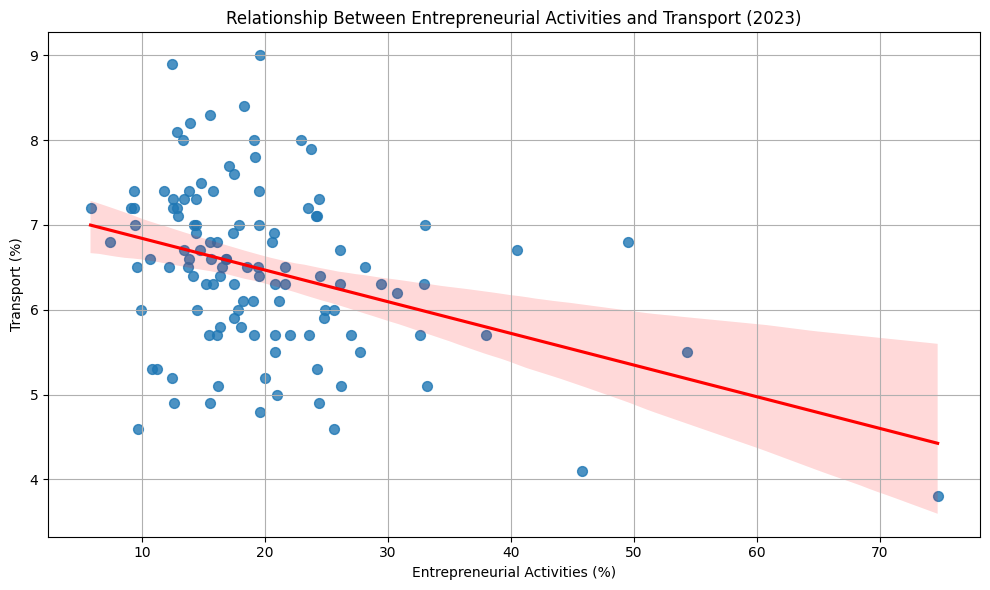

In [17]:
dfNumeric = pd.DataFrame({
    "Entrepreneurial Activities": x,
    "Transport": y
})

plt.figure(figsize=(10, 6))
sns.regplot(
    data=dfNumeric,
    x="Entrepreneurial Activities",
    y="Transport",
    scatter_kws={'s': 50},
    line_kws={'color': 'red'}
)
plt.title("Relationship Between Entrepreneurial Activities and Transport (2023)")
plt.xlabel("Entrepreneurial Activities (%)")
plt.ylabel("Transport (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

### **Final Answer:** A higher percentage in income from entrepeneurial activities does **not** correlate to higher spending in transport. In fact, an increase in income from entrepeneurial activities correlates to a decrease in spending for transport, and vice versa.